<a href="https://colab.research.google.com/github/feroz2017/Classify-Dogs-and-Cats-using-CNNs/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dir = tf.keras.utils.get_file('data.zip',origin=url,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [4]:
baseDir = os.path.join(os.path.dirname(dir),'cats_and_dogs_filtered')
trainDir = os.path.join(baseDir,'train')
validDir = os.path.join(baseDir,'validation')
trainCatsDir = os.path.join(trainDir,'cats')
trainDogsDir = os.path.join(trainDir,'dogs')
validCatsDir = os.path.join(validDir,'cats')
validDogsDir = os.path.join(validDir,'dogs')

In [5]:
ls /root/.keras/datasets/cats_and_dogs_filtered/train

cats/  dogs/


Data augmentation for cats and dogs images


# New Section

In [6]:
image_generator_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=45,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
    height_shift_range = 0.4,
    width_shift_range = 0.5
)
image_generator_valid = ImageDataGenerator(
    rescale = 1./255,
)
valid_Data_Gen = image_generator_valid.flow_from_directory(
    batch_size = 100,
    shuffle = True,
    directory = validDir,
    target_size = (150,150),
    class_mode = 'binary'
)
train_Data_Gen = image_generator_train.flow_from_directory(batch_size = 100,
                                                           directory = trainDir,
                                                           shuffle = True,
                                                           target_size = (150,150),
                                                           class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(2)
])

In [8]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_Data_Gen,
                    epochs = 100,
                    validation_data = valid_Data_Gen
                    )

Epoch 1/100
20/20 [==============================] - 17s 832ms/step - loss: 0.7697 - accuracy: 0.4970 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 17s 861ms/step - loss: 0.6940 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 3/100
20/20 [==============================] - 17s 866ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6929 - val_accuracy: 0.5360
Epoch 4/100
20/20 [==============================] - 17s 873ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 5/100
20/20 [==============================] - 17s 873ms/step - loss: 0.6931 - accuracy: 0.5115 - val_loss: 0.6910 - val_accuracy: 0.5180
Epoch 6/100
20/20 [==============================] - 17s 864ms/step - loss: 0.6905 - accuracy: 0.5330 - val_loss: 0.6852 - val_accuracy: 0.5110
Epoch 7/100
20/20 [==============================] - 17s 864ms/step - loss: 0.6857 - accuracy: 0.5435 - val_loss: 0.6834 - val_accuracy:

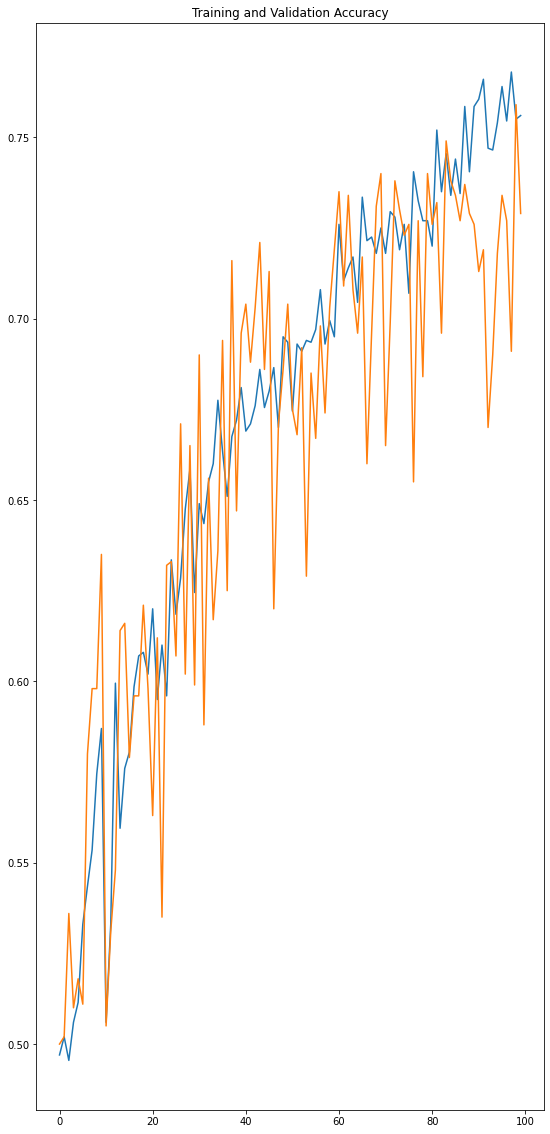

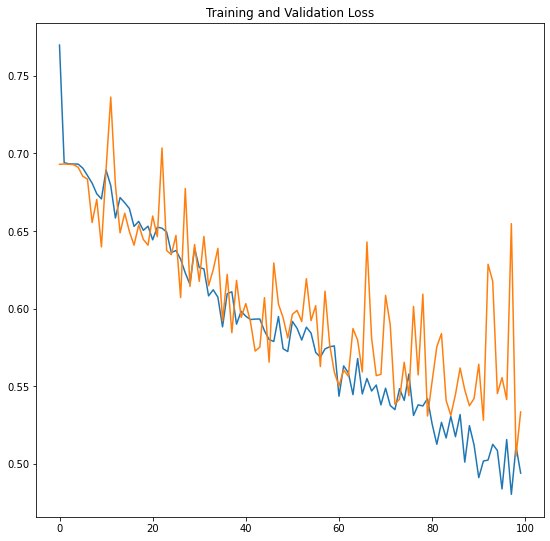

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,2)
plt.plot(range(100),history.history['accuracy'],label = 'Training Accuracy')
plt.plot(range(100),history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(range(100),history.history['loss'], label = 'Training loss')
plt.plot(range(100),history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.show()